In [1]:
import requests                                                                                                                                              
import urllib.request                                                                                                                                        
import time                                                                                                                                                  
from bs4 import BeautifulSoup                                                                                                                                
import pandas as pd                                                                                                                                          
                                                                                                                                                         
url = "http://www.planecrashinfo.com/1920/1920.htm?fbclid=IwAR36UHKh-n2OTB8BmwAhgPAigABSC-0oCfMUYsSijOms5oAatcQYinHK2Qs"                                     
                                                                                                                                                              
response = requests.get(url)                                                                                                                                 
                                                                                                                                                              
soup = BeautifulSoup(response.text, "html.parser")                                                                                                           
tds = soup.findAll('td')                                                                                                                                     
                                                                                                                                                              
year = 1920                                                                                                                                                  
                                                                                                                                                              
full_lst = []                                                                                                                                                
while year < 2020:                                                                                                                                           
    url = "http://www.planecrashinfo.com/{year}/{year}.htm?fbclid=IwAR36UHKh-n2OTB8BmwAhgPAigABSC-0oCfMUYsSijOms5oAatcQYinHK2Qs"                             
    fmt_url = url.format(year=year)                                                                                                                          
    year += 1                                                                                                                                                
    response = requests.get(fmt_url)                                                                                                                         
                                                                                                                                                              
    soup = BeautifulSoup(response.text, "html.parser")                                                                                                       
    tds = soup.findAll('td')                                                                                                                                
                                                                                                                                                              
    lst = []                                                                                                                                                 
    inner = []                                                                                                                                               
    for i,v in enumerate(tds):
        if i < 4:
            if '/' in v.text:
                txt = v.text.split('/')
            else:
                txt = [v.text]
            inner.extend(txt)
            
        else:
            if (i+1)%1 == 0 or (i+1)%2 == 0:
                txt = v.get_text(strip=True,separator="|||").split("|||")
            else:
                txt = [v.text]                                                                                                                                         
            inner.extend(txt)                                                                                                                                    
        if (i+1)%4 == 0:                                                                                                                                     
            lst.append(inner)                                                                                                                                
            inner = []                                                                                                                                       
    full_lst.append(lst)                                                                                                                                     
                                                                                                                                                              
df = pd.DataFrame()                                                                                                                                          
for yr in full_lst:                                                                                                                                          
    inner_df = pd.DataFrame(yr)
    h = inner_df.iloc[0]
    inner_df = inner_df.iloc[1:]
    inner_df.columns=h
    df = df.append(inner_df)
df.to_csv('clean_fat.csv')

In [3]:
import pandas as pd
df = pd.read_csv('clean_fat.csv',index_col=0)

In [4]:
df.head()

Date                           Location                 Operator  \
1  17 Sep 1908                 Fort Myer, Virginia    Military - U.S. Army   
2  07 Sep 1909             Juvisy-sur-Orge, France                       ?   
3  12 Jul 1912           Atlantic City, New Jersey    Military - U.S. Navy   
4  06 Aug 1913  Victoria, British Columbia, Canada                 Private   
5  09 Sep 1913                  Over the North Sea  Military - German Navy   

           Aircraft Type   Registration Fatalities  
1        Wright Flyer III             ?     1/2(0)  
2          Wright Byplane           SC1     1/1(0)  
3               Dirigible             ?     5/5(0)  
4        Curtiss seaplane             ?     1/1(0)  
5  Zeppelin L-1 (airship)             ?   14/20(0)

In [5]:
import re
def fat_to_int(s):
    l=re.findall(r'\d+',s)
    l=[int(x) for x in l]
    return sum(l)

In [6]:
df['Tot_Fat'] = df['Fatalities'].apply(fat_to_int)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

Date                           Location                 Operator  \
1 1908-09-17                 Fort Myer, Virginia    Military - U.S. Army   
2 1909-09-07             Juvisy-sur-Orge, France                       ?   
3 1912-07-12           Atlantic City, New Jersey    Military - U.S. Navy   
4 1913-08-06  Victoria, British Columbia, Canada                 Private   
5 1913-09-09                  Over the North Sea  Military - German Navy   

           Aircraft Type   Registration Fatalities  Tot_Fat  
1        Wright Flyer III             ?     1/2(0)        3  
2          Wright Byplane           SC1     1/1(0)        2  
3               Dirigible             ?     5/5(0)       10  
4        Curtiss seaplane             ?     1/1(0)        2  
5  Zeppelin L-1 (airship)             ?   14/20(0)       34

In [9]:
import seaborn as sns

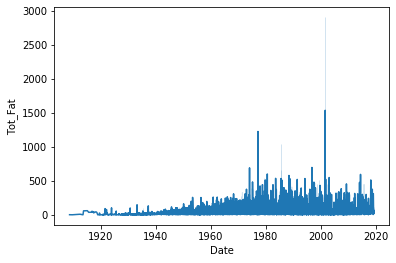

In [16]:
sns.lineplot(x="Date", y="Tot_Fat",data=df)

In [67]:
df.columns

Index(['Date', 'Location ', ' Operator', 'Aircraft Type ', ' Registration',
       'Fatalities', 'Tot_Fat', 'Year', 'Month'],
      dtype='object')

/Users/kevinhuang/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kevinhuang/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kevinhuang/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/kevinhuang/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


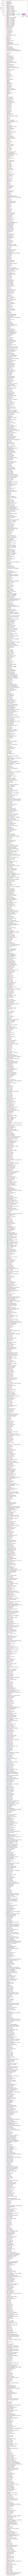

In [69]:
sns.lineplot(x="Date", y="Tot_Fat",hue='Aircraft Type ',data=df)

In [25]:
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)

In [57]:
d = df.groupby(['Year','Month']).sum()
d = d.reset_index()

In [58]:
d = d[(d['Year']>=1980)&(d['Year']<=2000)]
d=d.pivot('Month','Year','Tot_Fat')

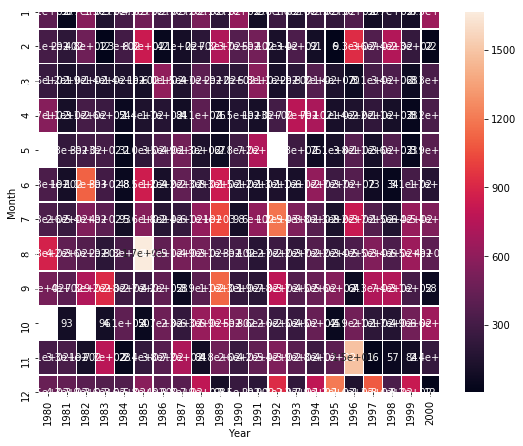

In [60]:
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(d, annot=True,  linewidths=.5,ax=ax)

In [ ]:
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")


In [46]:
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

In [47]:
flights

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237   271   305   310   362   
December    118   140   166   194   201   229   278   306   336   337   405   

year       1960  
month            
January     417  
February    391  
March       419  
April       461  
May         472  
June        535  
July        622  
August      606  
September   508  
October     461  
November    390  
December    432

In [48]:
import matplotlib.pyplot as plt

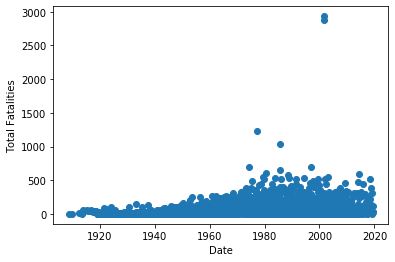

In [139]:
plt.scatter(x=df['Date'], y=df['Tot_Fat'])
plt.ylabel('Total Fatalities')
plt.xlabel('Date')
plt.show()

In [82]:
df_slice = df[(df['Year']>=1980)&(df['Year']<=2000)]
df_slice[' Operator'].drop_duplicates().count()

799

In [83]:
len(df_slice)

1246

In [84]:
df.head()

Date                           Location                 Operator  \
1 1908-09-17                 Fort Myer, Virginia    Military - U.S. Army   
2 1909-09-07             Juvisy-sur-Orge, France                       ?   
3 1912-07-12           Atlantic City, New Jersey    Military - U.S. Navy   
4 1913-08-06  Victoria, British Columbia, Canada                 Private   
5 1913-09-09                  Over the North Sea  Military - German Navy   

           Aircraft Type   Registration Fatalities  Tot_Fat  Year  Month  
1        Wright Flyer III             ?     1/2(0)        3  1908      9  
2          Wright Byplane           SC1     1/1(0)        2  1909      9  
3               Dirigible             ?     5/5(0)       10  1912      7  
4        Curtiss seaplane             ?     1/1(0)        2  1913      8  
5  Zeppelin L-1 (airship)             ?   14/20(0)       34  1913      9

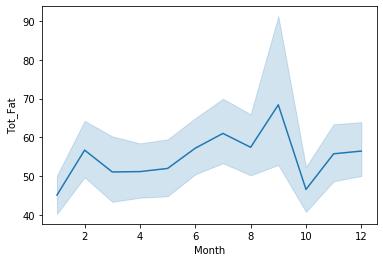

In [85]:
sns.lineplot('Month',y='Tot_Fat',data=df)

In [98]:
df['p_aricraft'] = df['Aircraft Type '].apply(lambda x: x.split()[0])

In [99]:
df['p_aircraft'].drop_duplicates().count()

KeyError: 'p_aircraft'

In [90]:
df['p_location'] = df['Location '].apply(lambda x: x.split()[-1])

In [100]:
df.head()

Date                           Location                 Operator  \
1 1908-09-17                 Fort Myer, Virginia    Military - U.S. Army   
2 1909-09-07             Juvisy-sur-Orge, France                       ?   
3 1912-07-12           Atlantic City, New Jersey    Military - U.S. Navy   
4 1913-08-06  Victoria, British Columbia, Canada                 Private   
5 1913-09-09                  Over the North Sea  Military - German Navy   

           Aircraft Type   Registration Fatalities  Tot_Fat  Year  Month  \
1        Wright Flyer III             ?     1/2(0)        3  1908      9   
2          Wright Byplane           SC1     1/1(0)        2  1909      9   
3               Dirigible             ?     5/5(0)       10  1912      7   
4        Curtiss seaplane             ?     1/1(0)        2  1913      8   
5  Zeppelin L-1 (airship)             ?   14/20(0)       34  1913      9   

  p_aricraft p_location p_operator  
1     Wright   Virginia   Military  
2     Wright     France          ?  
3  Dirigible     Jersey   Military  
4    Curtiss     Canada    Private  
5   Zeppelin        Sea   Military

In [94]:
df['p_operator'] = df[' Operator'].apply(lambda x: x.split()[0])

In [115]:
df.groupby('p_aricraft').count().sort

TypeError: sort_values() missing 1 required positional argument: 'by'

In [126]:
top_10_air = df.groupby('p_aricraft').count().sort_values(by='Date',ascending=False).head(10).index.values

In [127]:
top_10_air

array(['Douglas', 'Boeing', 'Lockheed', 'Antonov', 'de', 'Ilyushin',
       'Fokker', 'McDonnell', 'Curtiss', 'Tupolev'], dtype=object)

In [133]:
top_10_air_df = df[df['p_aricraft'].isin(top_10_air)]

In [134]:
top_1

2870

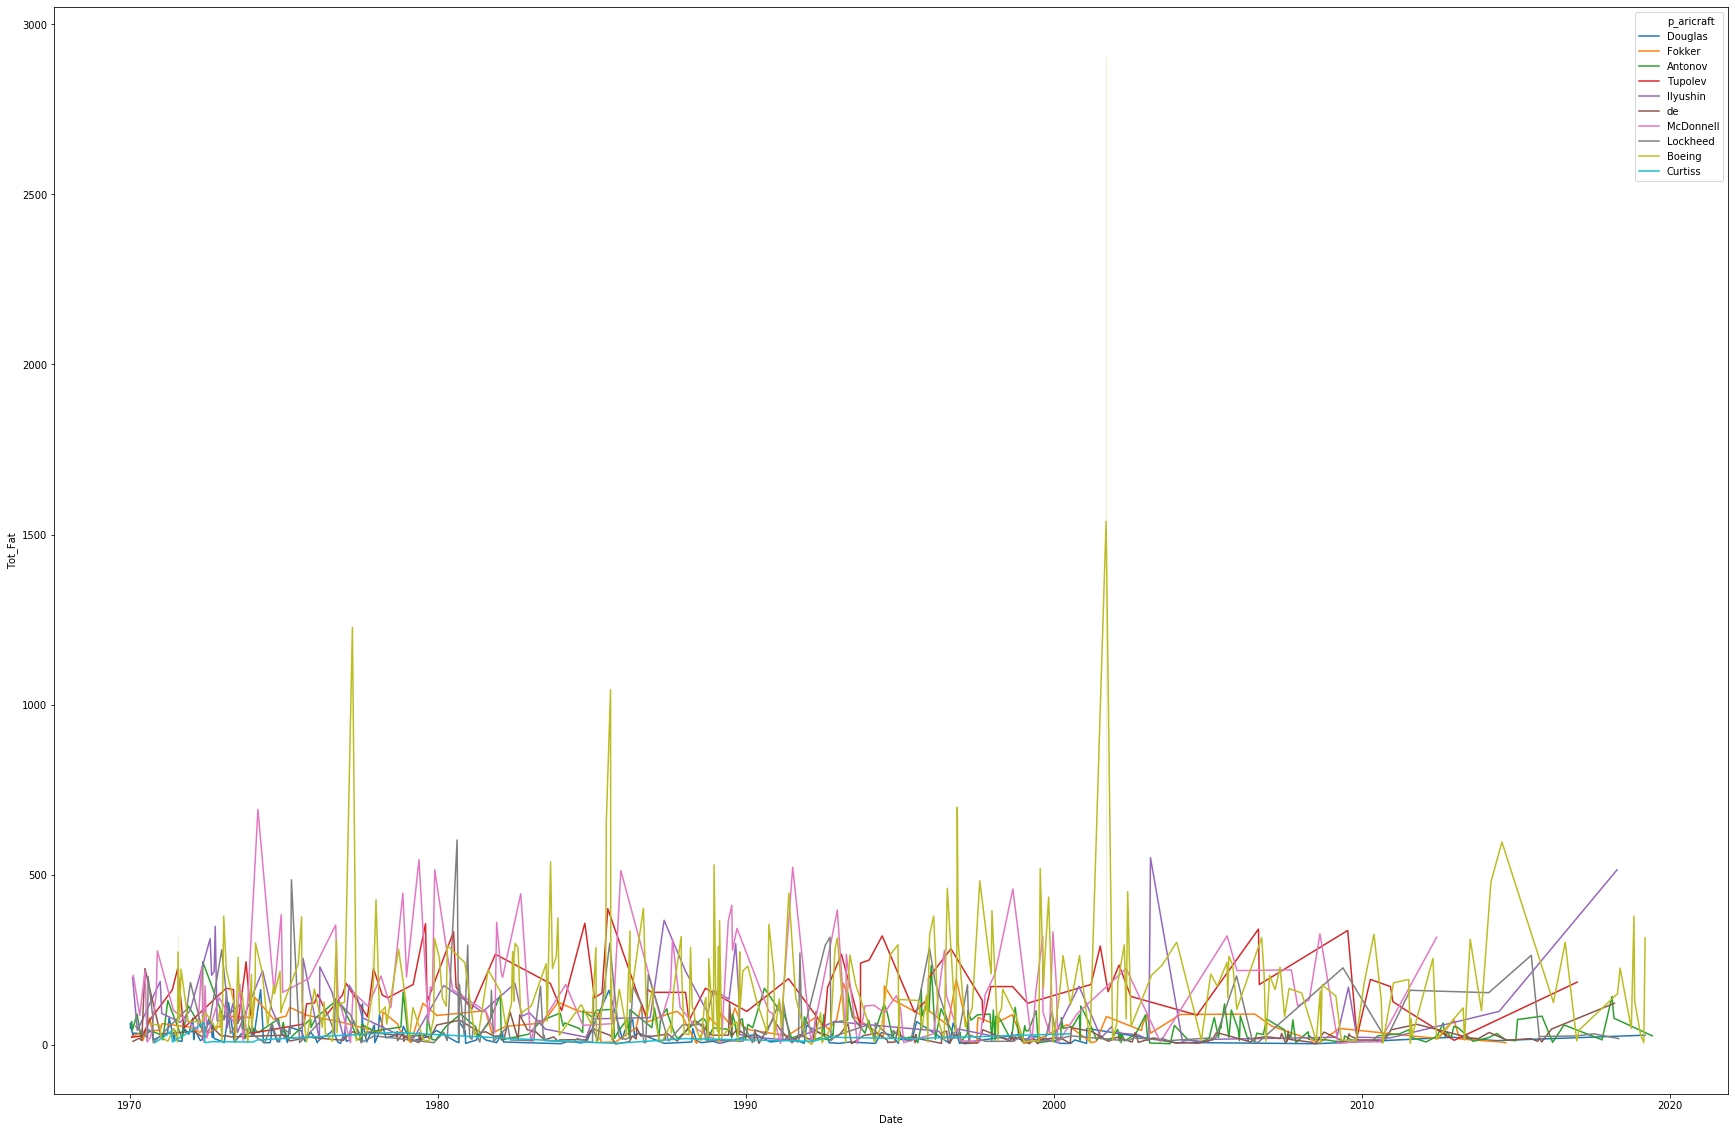

In [138]:
f, ax = plt.subplots(figsize=(30, 20))
sns.lineplot(x="Date", y="Tot_Fat",hue='p_aricraft',data=top_10_air_df[top_10_air_df['Year']>=1970],ax=ax)